# Importing libraries, ords_prods_merge48 & checking outcome

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'/Users/stefaniadaskalaki/Data Immersion/4 Achievement Python/CF4.2 Instacart Basket Analysis'

In [3]:
df_ords_prods_merge48=pd.read_pickle(os.path.join(path, '02. Data', '02. Prepared Data', 'ords_prods_merge48.pkl'))

In [4]:
df_ords_prods_merge48.shape

(32404859, 25)

In [6]:
df_ords_prods_merge48.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_order_median,frequency_order_median_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,High spender,30.0,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,14.0,High spender,30.0,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,14.0,High spender,30.0,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,14.0,High spender,30.0,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,14.0,High spender,30.0,Non-frequent customer


# Creating Bar Charts

<AxesSubplot:>

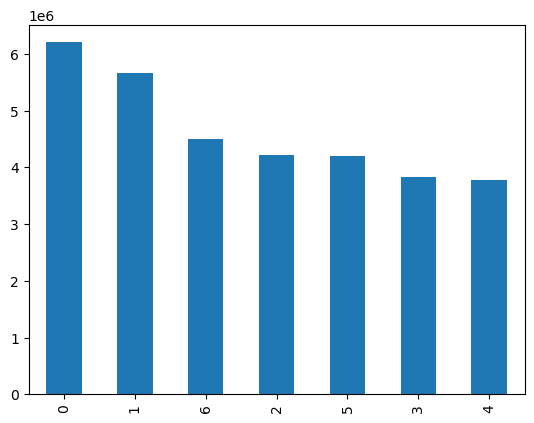

In [8]:
df_ords_prods_merge48['order_day_of_week'].value_counts().plot.bar()

# Bar chart sorted instead of highest result to lowest result but based on index 1-6

<AxesSubplot:>

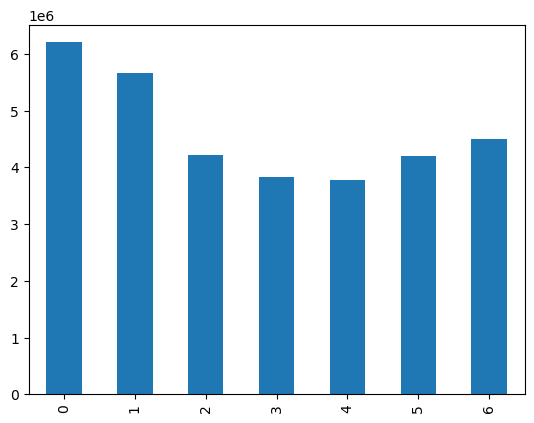

In [9]:
df_ords_prods_merge48['order_day_of_week'].value_counts().sort_index().plot.bar()

## Using index_sort for frequency

In [12]:
df_ords_prods_merge48['order_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [11]:
df_ords_prods_merge48['order_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

## Adding colour in the b ar chart

<AxesSubplot:>

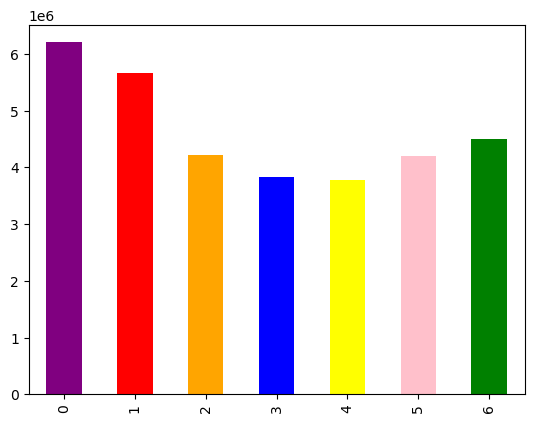

In [16]:
df_ords_prods_merge48['order_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','orange','blue','yellow','pink','green']) 

## Saving the bar chart in the df

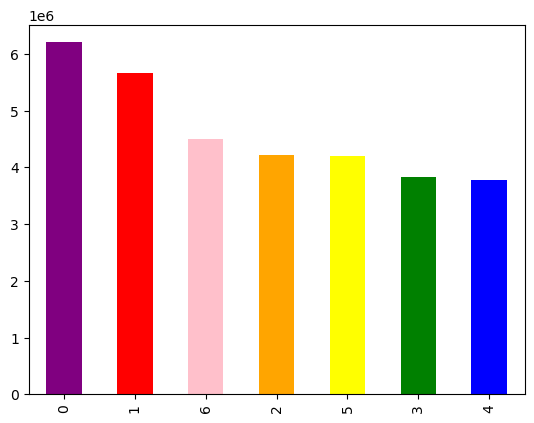

In [17]:
bar = df_ords_prods_merge48['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red','pink', 'orange', 'yellow', 'green', 'blue'])

## Exporting bar chart in the 04.Analysis/01. Visualisations folder

In [19]:
bar.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'bar_orders_dow.png'))

# Creating a Histogram for the 'prices' column

<AxesSubplot:ylabel='Frequency'>

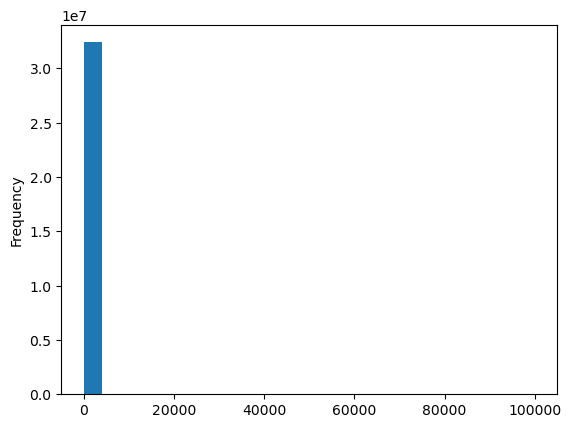

In [20]:
df_ords_prods_merge48['prices'].plot.hist(bins = 25)

something doesn't look good. Doing some checks on the column 'prices' to see what has happened.

In [21]:
df_ords_prods_merge48['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [23]:
df_ords_prods_merge48['prices'].mean()

11.980225638467232

In [25]:
df_ords_prods_merge48['prices'].min()

1.0

In [26]:
df_ords_prods_merge48['prices'].max()

99999.0

In [27]:
df_ords_prods_merge48['prices'].median()

7.4

an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

### Creating scatterplot to identify any outliers

<AxesSubplot:xlabel='prices', ylabel='prices'>

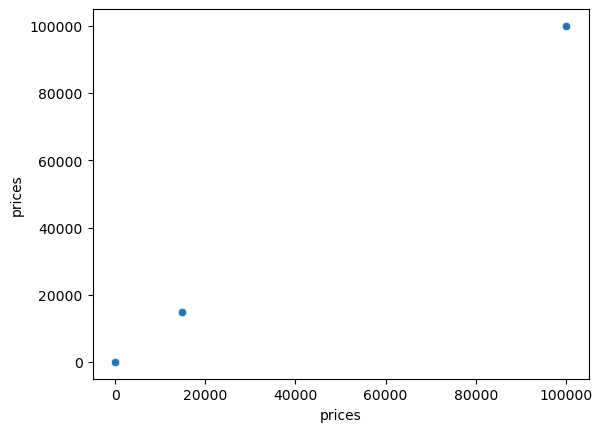

In [28]:
sns.scatterplot(x = 'prices', y = 'prices',data= df_ords_prods_merge48)

The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close to 100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier. Run this check via the following code:

In [33]:
df_ords_prods_merge48.loc[df_ords_prods_merge48['prices']> 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,frequency_order_median,frequency_order_median_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,14900.0,High spender,30.0,Non-frequent customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,14900.0,High spender,30.0,Non-frequent customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,14900.0,High spender,13.0,Regular customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,14900.0,High spender,13.0,Regular customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,14900.0,High spender,30.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,99999.0,High spender,30.0,Non-frequent customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,99999.0,High spender,30.0,Non-frequent customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,99999.0,High spender,11.0,Regular customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,99999.0,High spender,30.0,Non-frequent customer


there are 5,127 rows with outlier observations (prices greater than $100). In addition, at the top of the “prices” column, you can see that there’s another odd value, $14,900.00, which corresponds to the second unexplainable point in the scatterplot. Following this is the $99,999.00 you identified previously. As such, you can assume that it’s the $14,900.00 and $99,999.00 values that are skewing your charts.

## Mark the outliers values in NaN

In [34]:
df_ords_prods_merge48.loc[df_ords_prods_merge48['prices']>100, 'prices'] = np.nan

In [37]:
df_ords_prods_merge48['prices'].max()

25.0

## Creating again the histogram after fixing the outliers & saving it

<AxesSubplot:ylabel='Frequency'>

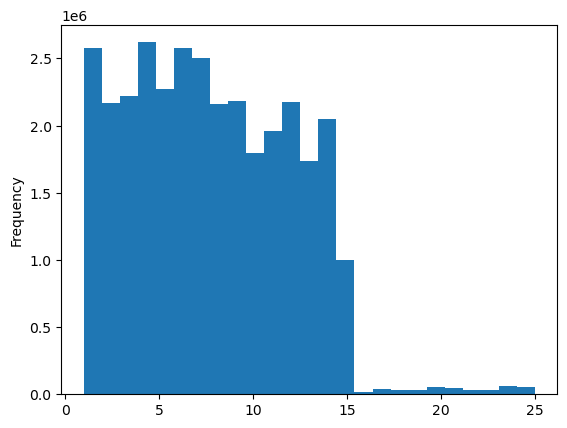

In [38]:
df_ords_prods_merge48['prices'].plot.hist(bins = 25)

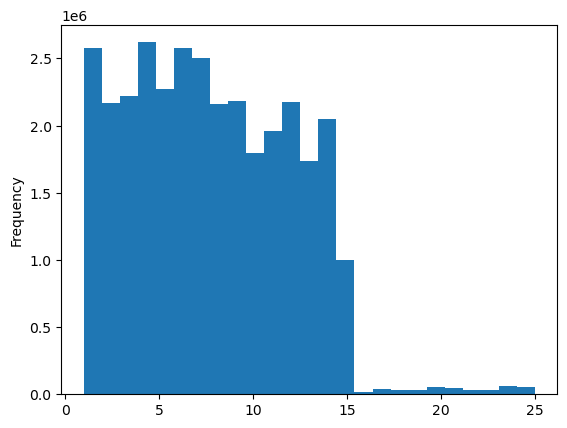

In [39]:
hist=df_ords_prods_merge48['prices'].plot.hist(bins = 25)

### To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. This will result in a histogram with more, thinner columns:

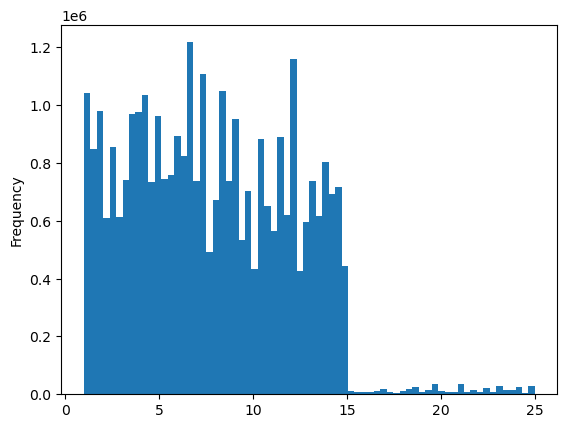

In [40]:
hist_2=df_ords_prods_merge48['prices'].plot.hist(bins = 70)

## Exporting the histogram

In [41]:
hist.figure.savefig(os.path.join(path, '04. Analysis','01. Visualisations', 'hist_price_frequency.png'))

# Splitting the df to two sample dfs to avoid memory crash so i can create a line chart

## Creating a list holding True/False values to the test np.random.rant( ) <=0.7  

In [44]:
dev = np.random.rand(len(df_ords_prods_merge48)) <=0.7

## Splitting the df in two 
70 percent of the dataframe in the big sample and 30 percent of the dataframe in the small sample
For every value in the list that’s False , the corresponding row in your dataframe will be stored in the small sample

### Store 70% of the sample in the df Big

In [45]:
big = df_ords_prods_merge48[dev]

### Store 30% of the sample in the df Small

In [46]:
small = df_ords_prods_merge48[~dev]

## Checking the outcome of the split

In [47]:
len(df_ords_prods_merge48)

32404859

In [48]:
len(big)+len(small)

32404859

# Reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week'

In [50]:
df_2 = small[['order_day_of_week','prices']]

# Creating line chart and save it as 'line' in the df_2
The blue line, then, represents how prices differ depending on the day of the week

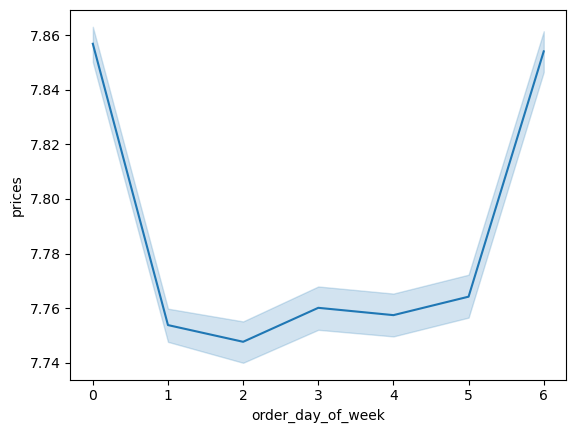

In [51]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')